# Click "Edit App" to see the code
# Improve figures layout

In this tutorial we'll learn how to make good figures, which would be suitable for your reports or for a publication or for an Honours thesis.

# The Jupyter Notebook

Let's start by loading the Python packages, note that this time there is one extra package, which will be used to modify the ticks on the figure's axes.

In [1]:
# python packages
import pandas as pd # Dataframes and reading CSV files
import numpy as np # Numerical libraries
import matplotlib.pyplot as plt # Plotting library
from lmfit import Model # Least squares fitting library

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator)

First of all we want to define the figure's size and the font size that we want to use in the various parts of the figure. We use a variable _fontsize_ for the largest font in the image and then define the font size on the axes and the legend as a proportion of its value. This is useful because if we change the figure's size, we'll have to change the font size too.

In [2]:
# Define the figure's parameters
fontsize=28
figureParameters = {'figure.figsize' : (12,8),
                    'legend.fontsize': fontsize*0.7,
                    'axes.labelsize' : fontsize,
                    'axes.titlesize' : fontsize,
                    'xtick.labelsize': fontsize*0.8,
                    'ytick.labelsize': fontsize*0.8,
                    'xtick.direction': "in", # tick marks inside the frame
                    'ytick.direction': "out", # tick marks outside the frame
                    'axes.linewidth' : 3,
                    'axes.titlepad'  : 25}

We then define a function that we can call to customise the axes of a figure.

In [3]:
def prettyTicks(ax):
    # Add tick marks on all sides of the figure
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')

    # Define the spacing of the major tick marks
    # It is useful to comment this lines the first time
    # we run the code to avoid errors because of an excessive
    # number of tick marks
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.yaxis.set_major_locator(MultipleLocator(0.01))
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(which='minor', length=6, width=3, color='black')
    ax.tick_params(which='major', length=12, width=3, color='black')

As a working example we can use a dataset for the Lambert-Beer law.
We load the data in a DataFrame and fit them with a line, similarly to what we did in the previous tutorial.

In [4]:
# Import the data
data = pd.read_csv("LB.csv")
data.columns = ("X","Y")
nval = len(data.index)

# fit the data with a line
def lline(x,m,q):
    return m*x + q
fitModel = Model(lline)
initialParameters = fitModel.make_params(m=1,q=1)
result = fitModel.fit(data["Y"], initialParameters, x=data["X"])

# Extract the best fitting parameters
mValue = result.best_values["m"]
qValue = result.best_values["q"]

# Create an array with the best fittig line
xl = np.arange(0,11)
plotLine = lline(xl,mValue,qValue)

For illustrative purposes, let's just make a graph without any customisations/

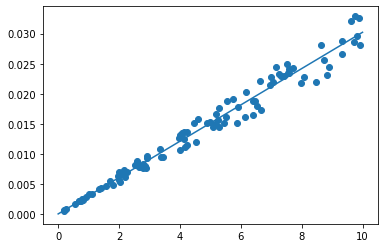

In [5]:
# Create the figure with the data points and their fit
fig = plt.figure()
ax = fig.gca()
ax.scatter(data["X"], data["Y"])
ax.plot(xl,plotLine)

# Make the figure
plt.show()

Let's now make a better figure. These are the steps that we are going to follow:
1. Set figure parameters that we have defined earlier
2. Create new figure and axes objects
3. Add data and the fit line to the axes
4. Set the axes' labels
5. Set the limits of the axes
6. Make pretty tick marks by calling the function we defined before
7. Add legend to the plot in the upper left corner
8. Display the figure

These commands have to be put in one box otherwise there can be problems with the figure representation.

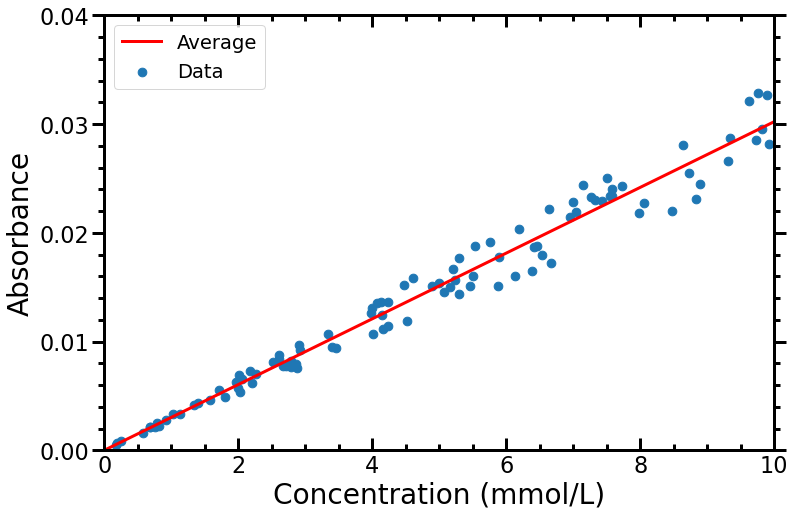

In [6]:
plt.rcParams.update(figureParameters)

fig2 = plt.figure()
ax = fig2.gca()

ax.scatter(data["X"], data["Y"], label="Data", s=75)
ax.plot(xl,plotLine, color='red', lw=3, label="Average")

ax.set(xlabel="Concentration (mmol/L)")
ax.set(ylabel="Absorbance")

plt.xlim([0,10])
plt.ylim([0,0.04])

prettyTicks(ax)

ax.legend(loc="upper left")

plt.show()

Although the plot is not perfect (tick marks should all be pointing inward or outward), it is a much better figure than the default one, and it can be used in a scientific document.
Equally good figures can probably be done with Excel, but, in my opinion, this approach has the advantage that once a script is prepared all figures of a paper/thesis can be readily produced with a consistent style and little extra effort.

The figure could be saved to a file by adding this command to a Python cell.
```python
fig2.savefig("figure.png")
```